# ARIMA Model

AutoRegressive Integrated Moving Average.

Auto Regression and Moving average(rolling mean) ,Back Timeshift  [p,q,d]

In [24]:
# ARIMA

#imoporting all lib.


import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,8


import os

os.chdir('C:\\Users\\aksom\Desktop\\ML Projects\\Time Series')

In [8]:
dataset = pd.read_csv('Airline_Passengers_Dataset.csv')
dataset

,Month,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121
...,...,...
139,8/1/1960,606
140,9/1/1960,508
141,10/1/1960,461
142,11/1/1960,390


In [13]:
# Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
dataset.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
indexedDataset = dataset.set_index(['Month'])
indexedDataset.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
from datetime import datetime
indexedDataset['1949-03']
indexedDataset['1949-03':'1949-06']
indexedDataset['1949']

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


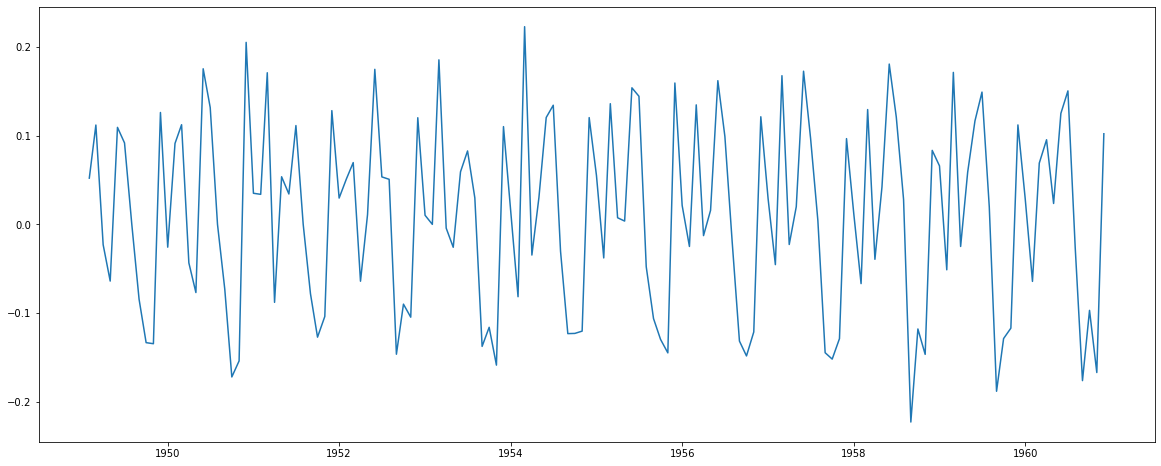

In [53]:
indexedDataset_logScale = np.log(indexedDataset)

#plt.plot(indexedDataset_logScale)

datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift(1)
plt.plot(datasetLogDiffShifting)

datasetLogDiffShifting.dropna(inplace=True)

In [18]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


In [19]:
lag_acf

array([ 1.        ,  0.19975134, -0.12010433, -0.15077204, -0.32207432,
       -0.08397453,  0.02577843, -0.11096075, -0.33672146, -0.11558631,
       -0.10926704,  0.20585223,  0.84142998,  0.21508704, -0.13955394,
       -0.11599576, -0.27894284, -0.05170646,  0.01245814, -0.1143576 ,
       -0.33717439])

In [20]:
lag_pacf

array([ 1.        ,  0.20081508, -0.17368194, -0.09901213, -0.33527437,
        0.00872185, -0.07990745, -0.21923579, -0.5421352 , -0.22848913,
       -0.64775301, -0.53828661,  0.59971786,  0.29995642, -0.10992268,
        0.14878637, -0.00321881,  0.01892684, -0.14268478,  0.07089814,
       -0.15566902])

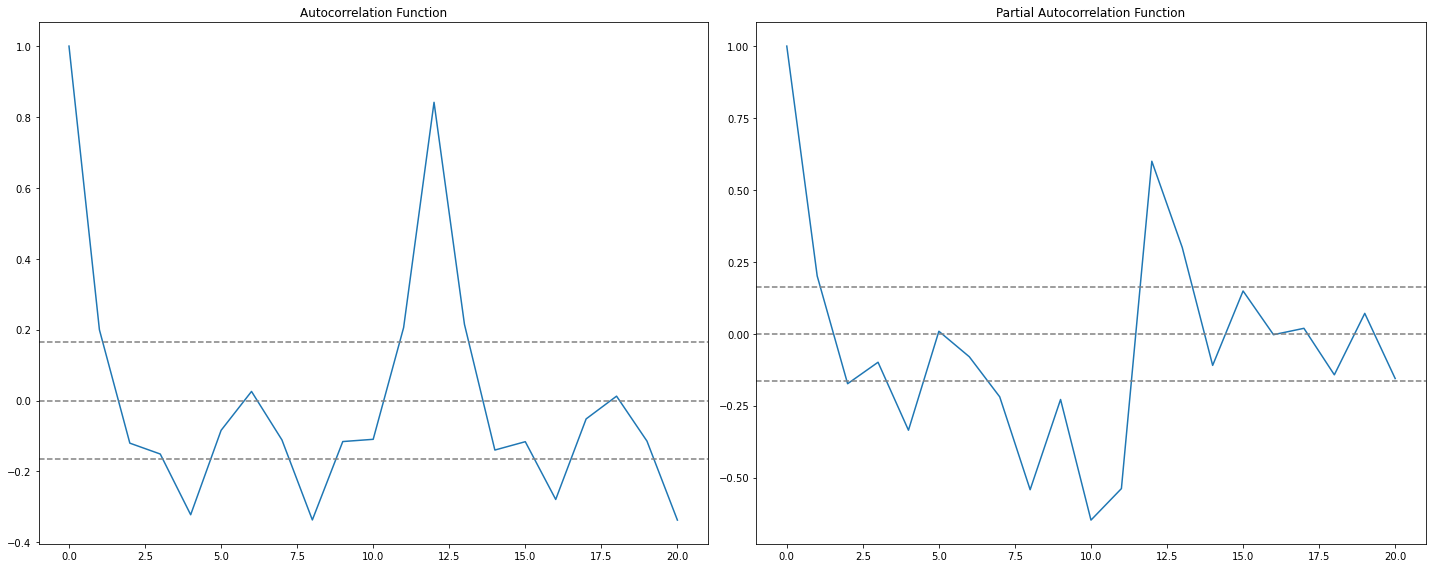

In [22]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')



#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Plotting AR model


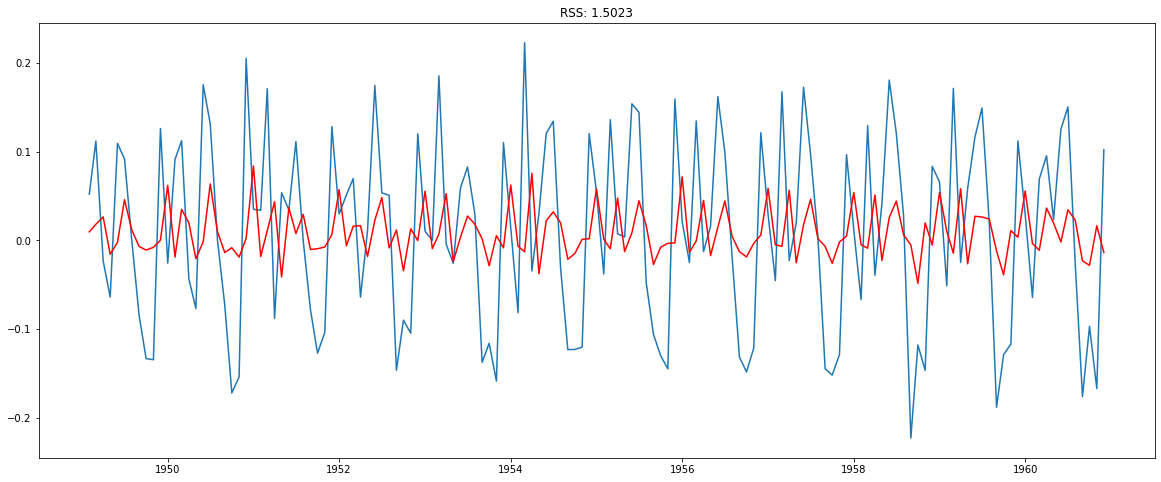

In [25]:
# AR Model

from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1) 

plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting AR model')

Plotting MA model


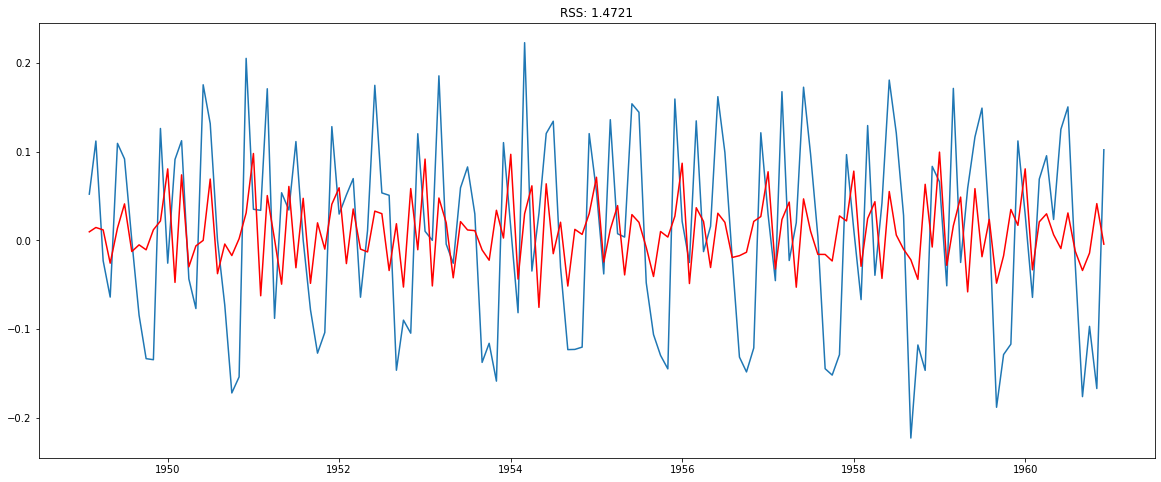

In [26]:
#MA MODEL

model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting MA model')

Text(0.5, 1.0, 'RSS: 1.0292')

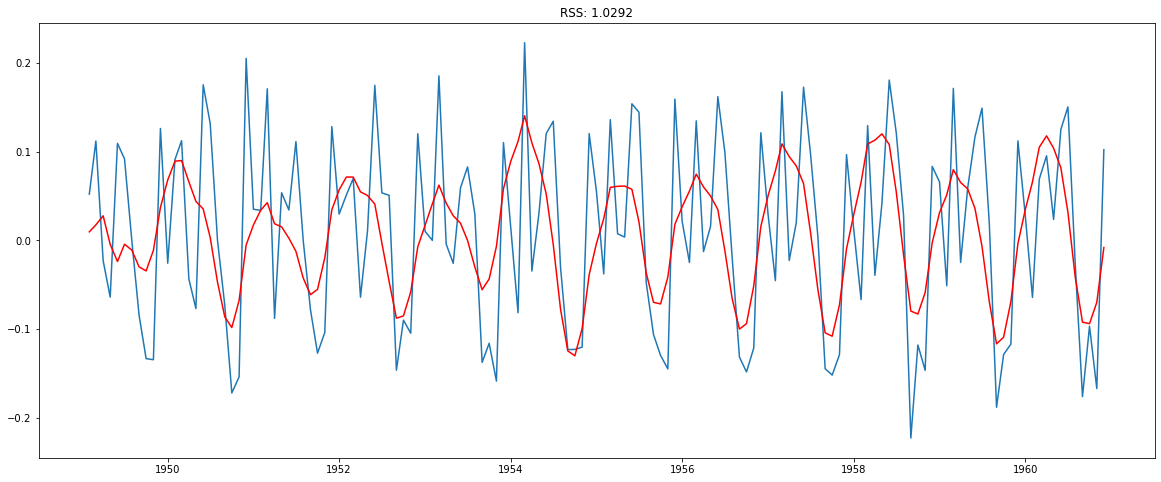

In [27]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))


In [28]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64

In [29]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372554
1960-09-01    1.280204
1960-10-01    1.186191
1960-11-01    1.116267
1960-12-01    1.108141
Length: 143, dtype: float64

In [47]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'], index=indexedDataset_logScale['Passengers'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
                ...   
1960-08-01    7.779434
1960-09-01    7.510686
1960-10-01    7.319589
1960-11-01    7.082414
1960-12-01    7.176566
Length: 144, dtype: float64

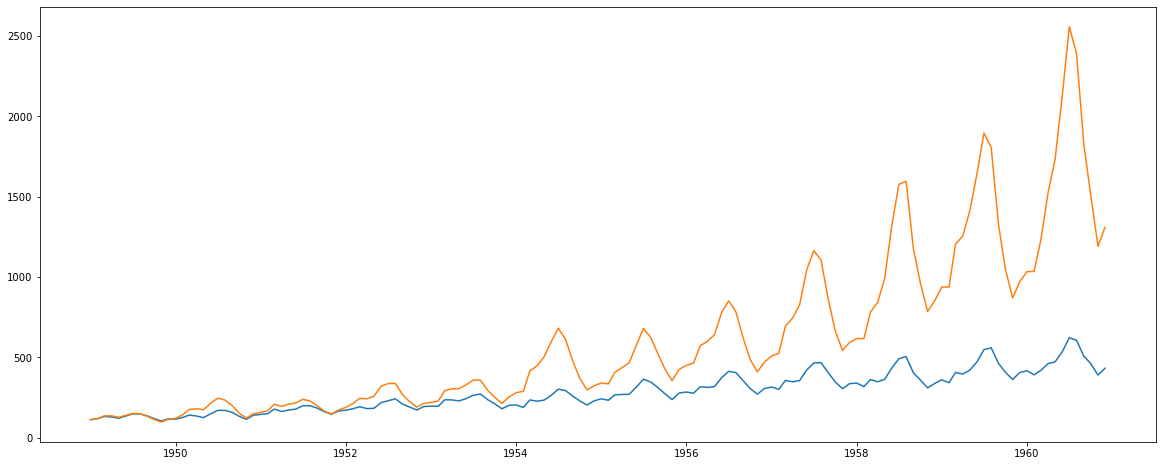

In [50]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA

plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% sum((predictions_ARIMA-indexedDataset["Passengers"])**2)/len(indexedDataset["Passengers"]))

In [51]:
results_ARIMA.forecast(steps=20)

(array([6.09553394, 6.15281405, 6.22442968, 6.29241102, 6.34164717,
        6.36359362, 6.35784688, 6.33139308, 6.29597546, 6.2644772 ,
        6.24738332, 6.25025176, 6.27275838, 6.30940311, 6.35151491,
        6.38988652, 6.4172738 , 6.43011055, 6.42906693, 6.41842496]),
 array([0.08384711, 0.10749462, 0.11568695, 0.11702776, 0.11703498,
        0.11744018, 0.1176225 , 0.11778714, 0.12024163, 0.12736042,
        0.13870959, 0.15118792, 0.16157813, 0.16834395, 0.1717733 ,
        0.17311983, 0.17358733, 0.1738546 , 0.17430218, 0.17543333]),
 array([[5.93119662, 6.25987126],
        [5.94212847, 6.36349964],
        [5.99768742, 6.45117194],
        [6.06304083, 6.52178122],
        [6.11226283, 6.57103151],
        [6.1334151 , 6.59377215],
        [6.12731101, 6.58838275],
        [6.10053453, 6.56225163],
        [6.06030619, 6.53164473],
        [6.01485536, 6.51409905],
        [5.97551751, 6.51924913],
        [5.95392888, 6.54657464],
        [5.95607106, 6.5894457 ],
        [5